<a href="https://colab.research.google.com/github/BautistaDavid/Proyectos_ClaseML/blob/corte_2/Proyecto5_exploracion_datos_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
!pip install squarify

In [70]:
# These are all the modules used in this notebook. However, later we are going to re-import some specific modules to show you when they are used.
from folium import plugins
import folium
import geopy.distance 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
# import squarify as sq 


# **Exploring New York city Airbnb Data**

In [71]:
abnb_data = pd.read_csv('https://raw.githubusercontent.com/BautistaDavid/Proyectos_ClaseML/main/data/AB_NYC_2019.csv')

## **¡A quick Look!**

**Let's check the first ten rows ...**

In [72]:
abnb_data.head(10) 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


**Now the last ten ...**

In [73]:
abnb_data.tail(10) 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


**And what about the shape of the data?**

In [74]:
abnb_data.shape   

(48895, 16)

**Also we can verify that all the columns names are in snake_case**

In [75]:
abnb_data.columns    

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Now we can check what kind of data has every columns**

In [76]:
abnb_data.dtypes   

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Is necessary to change the columns dtypes ?**

In [77]:
for col in ['neighbourhood_group','room_type','neighbourhood']:  # We can change the data kind of some columns from 'object' to 'category'
  abnb_data[col] = abnb_data[col].astype('category')

abnb_data['host_id'] = abnb_data['host_id'].astype('object') 

abnb_data.drop(columns = ['host_name','name','id','last_review',], inplace = True) # Now we can drop some variables that are no usefull 

**Finally... Info about the data**

In [78]:
abnb_data.info()  # Checking the info about the dataset we find that 'reviews_per_month' variables has missing values
# So now let's talk about this ... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   host_id                         48895 non-null  object  
 1   neighbourhood_group             48895 non-null  category
 2   neighbourhood                   48895 non-null  category
 3   latitude                        48895 non-null  float64 
 4   longitude                       48895 non-null  float64 
 5   room_type                       48895 non-null  category
 6   price                           48895 non-null  int64   
 7   minimum_nights                  48895 non-null  int64   
 8   number_of_reviews               48895 non-null  int64   
 9   reviews_per_month               38843 non-null  float64 
 10  calculated_host_listings_count  48895 non-null  int64   
 11  availability_365                48895 non-null  int64   
dtypes: category(3), fl

## **Now we have some problems ... Missing values :(**

**Lets localizing the missing values**

In [79]:
# # We are going to check the number of missing values in each column
# print('Number of Missing values by column\n ')
# for var in abnb_data.columns:
#   print(f'{var}: {abnb_data[var].isna().sum()}') 
# # abnb_data['price'].isna()

missing_info = pd.DataFrame()
cols = []
freq = []
for var in abnb_data.columns:
  cols.append(var)
  freq.append(abnb_data[var].isna().sum()) 

missing_info['column'] = cols
missing_info['missing_values'] = freq 
missing_info['percentage'] = missing_info['missing_values'] / len(abnb_data)

missing_info.set_index('column')


,missing_values,percentage
column,,
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000
minimum_nights,0,0.000000
number_of_reviews,0,0.000000


Check it out. It looks like all the missing values ​​are in just one columns, ```reviews_per_month```, so probably all the rows with missing values ​​will only have one.

We can use a heatmap to take a look at missing values ​​more easily. 

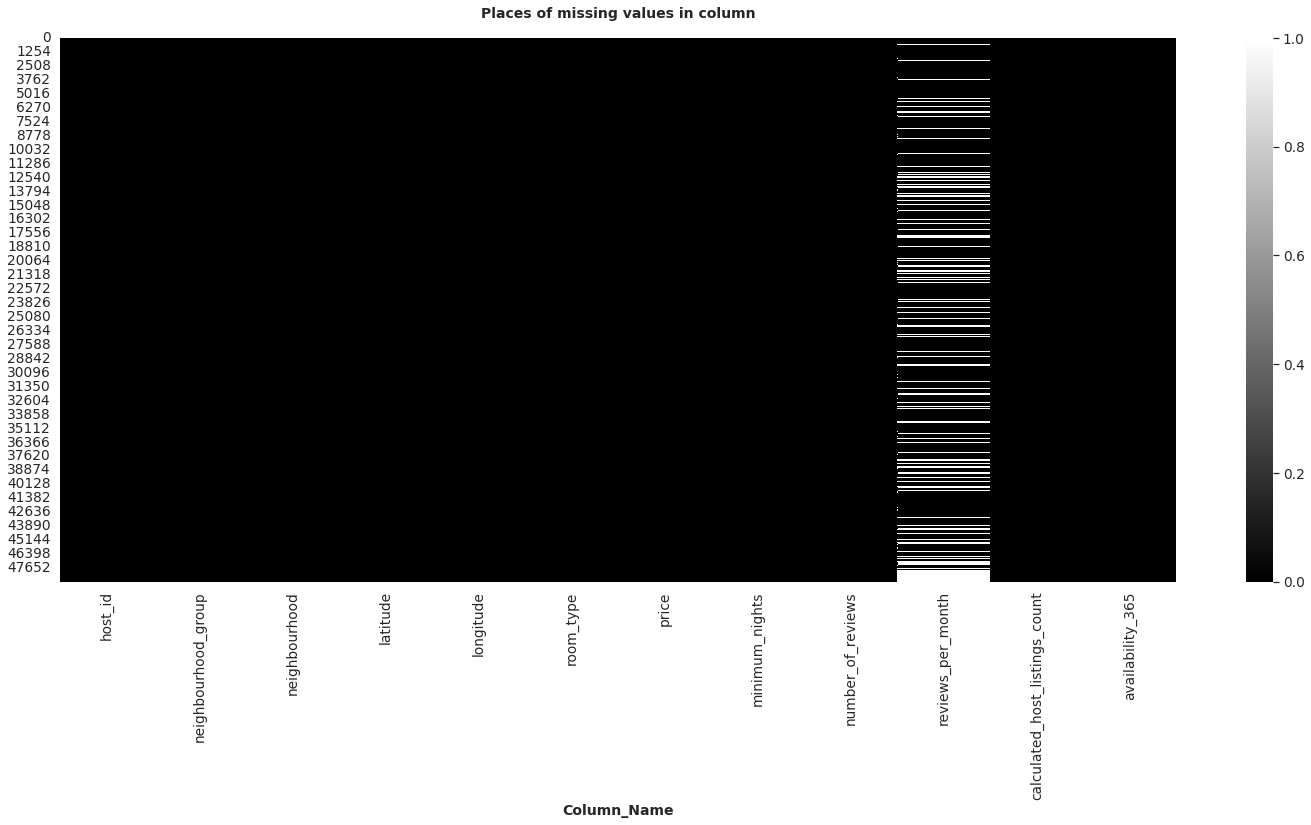

In [80]:
plt.figure(figsize=(25, 10))
sns.heatmap(abnb_data.isnull(), cbar=True, cmap='gray')  # .isnull() is going to give you a DataFrame with True or False... and remeber that ( True = 1 , False = 0)  
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

**So, how do we solve that?**

Note that whenever there is a null value in the ```reviews_per_month``` column is because the value of ```number of review column``` is 0. So we can solve this problem replacing the null values by 0. Now when the value in ```reviews_per_month``` is 0 meanings that this airbnb hostel has 0 views per month.

In [81]:
abnb_data['reviews_per_month'].replace({abnb_data.loc[2]['reviews_per_month']:0.0},inplace = True) # Replacing Null values with Zeros.

See how the rows that were changed look like now.

In [82]:
abnb_data[abnb_data['number_of_reviews'] == 0].head()  

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.0,1,365
19,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,0.0,2,249
26,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,0.0,1,0
36,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,0.0,1,365
38,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,0.0,1,365



## **What about the outliers?**

**First of all ... Univariate Analysis**

We can start by trying to identify univariate outliers in numerical columns

In [83]:
abnb_numerical = abnb_data.select_dtypes(exclude = ['category','object']).drop(columns = ['calculated_host_listings_count', 'latitude','longitude'])   # Lets build a DataFrame with just numerical data. 
#computed_host_listings_count, latitude and longitude are columns of type int64 but isnot logical to try to determine an outlier for this columns considering what it means


**We can observate descriptive statistic from the variables before try to identify outliers**

In [84]:
abnb_numerical.describe()   

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,112.781327
std,240.154170,20.510550,44.550582,1.597283,131.622289
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,365.000000


**We can calculate an upper and lower bound to determinante outliers**

In [85]:
def limits(serie):
  iqr = serie.quantile(q = 0.75) - serie.quantile(q = 0.25)
  return [serie.quantile(q = 0.75) + 1.5 * iqr, serie.quantile(q = 0.25) - 1.5 * iqr]

df_limites = pd.DataFrame()
for col in abnb_numerical.columns:
  df_limites[col] = limits(abnb_numerical[col])

df_limites['Limits'] = ['upper','lower']  
df_limites.set_index('Limits', inplace = True )
df_limites

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
Limits,,,,,
upper,334.0,11.0,58.5,3.89,567.5
lower,-90.0,-5.0,-33.5,-2.27,-340.5


let's look at some histograms after applying the lmits constraints to the variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


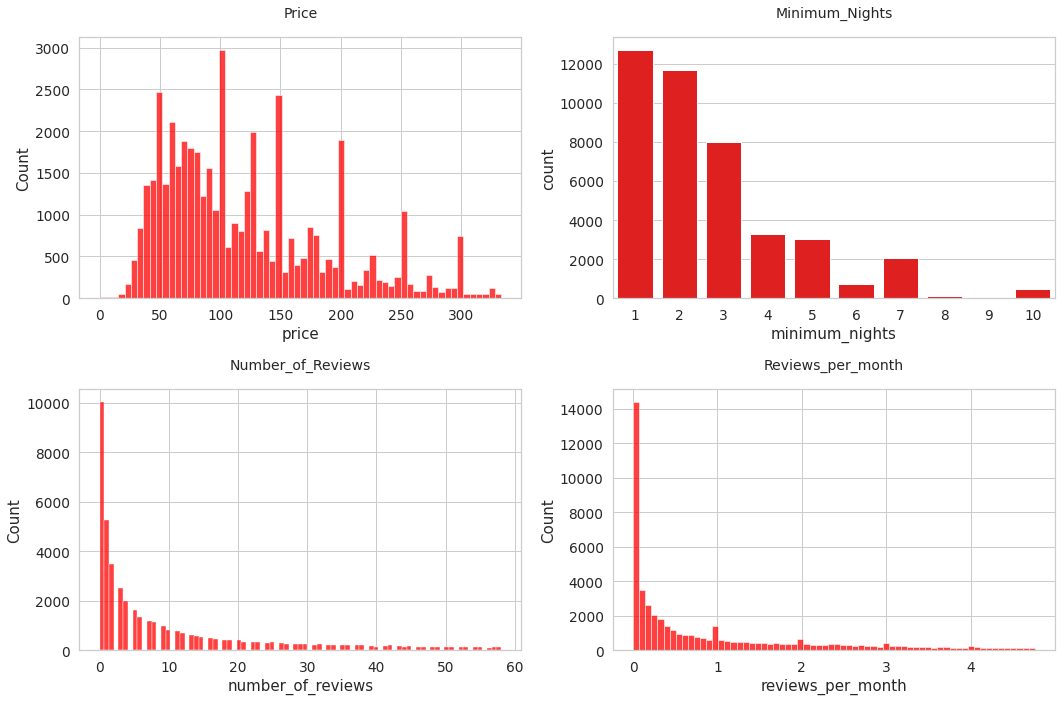

In [126]:
import matplotlib.pyplot as plt

price = abnb_numerical[(abnb_numerical['price'] < 334.0)]['price']
minimum_nights = abnb_numerical[(abnb_numerical['minimum_nights'] < 11.0)]['minimum_nights']
number_of_reviews = abnb_numerical[(abnb_numerical['number_of_reviews'] < 58.5)]['number_of_reviews']
reviews_per_month	= abnb_numerical[(abnb_numerical['reviews_per_month'] < 4.765)]['reviews_per_month'] 

fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.histplot(price,color = 'red', ax = ax[0,0])
sns.countplot(minimum_nights, color = 'red', ax = ax[0,1])
sns.histplot(number_of_reviews, color = 'red', ax = ax[1,0])
sns.histplot(reviews_per_month, color = 'red', ax = ax[1,1])

ax[0,0].set_title('Price',fontsize = 14)
ax[0,1].set_title('Minimum_Nights', fontsize = 14)
ax[1,0].set_title('Number_of_Reviews', fontsize = 14)
ax[1,1].set_title('Reviews_per_month', fontsize = 14)

fig.tight_layout()
plt.show()

 **however, if we want to apply any modification to the data is better to try analyzing the columns in a multivariable way** 

In [87]:
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
import numpy as np 

The Mahalanobis distance is the distance between two points in a multivariate space. It’s often used to find outliers in statistical analyses that involve several variables.

In [88]:
mahal_distances = []

for row in abnb_numerical.to_numpy():
  mahal_distances.append(mahalanobis(row, abnb_numerical.mean(), np.linalg.inv(np.cov(abnb_numerical.values.T))))

k = abnb_data.shape[0]

abnb_data['mahal_distances'] = mahal_distances 
abnb_data['p_value'] = 1 - chi2.cdf(abnb_data['mahal_distances'], k-1)


In [89]:
abnb_data = abnb_data[abnb_data['p_value'] >  0.05]

After applying the Mahalanobis distance to the data, the conclusion is that we cannot drop any rows. Perhaps the most interesting outliers were in the ```price``` column but we can discuss this later in relation to variables such location, room type and others.



## **Now... Let analyze duplicates**

There's two kind of duplicates, the first one is **explicit duplicates**, this happens when are row exactly equals. So we can use ```
drop_duplicates()``` from pandas to solve this.

In [90]:
print(f'Data shape before use drop_duplicates() : {abnb_data.shape}')
abnb_data.drop_duplicates(inplace = True)
print(f'Data Shape after drop_duplicates() : {abnb_data.shape}')


Data shape before use drop_duplicates() : (48895, 14)
Data Shape after drop_duplicates() : (48895, 14)


The second type of duplicates are **implicit duplicates**, This happens when the values ​​​​of the columns are written differently but they are the same data. Some of the columns that this is able to happen is price, minimum nights ans number of reviews however we set the kind data in int64 so we dont have any problem.


In [91]:
abnb_data.select_dtypes(include = 'int64').columns

Index(['price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

## **Let's talk for a second...Let's change the point of view**

There is a problem with this specific data, the column ```host_listings_count``` indicated the number of rows of a single host_id in all the data, that means maybe there is the same airbnb hostel more than once.

All this becomes a problem because the main idea of ​​our data visualization is to understand information about the total number of airbnbs but without them being repeated.

It is understood that this type of information where a record of several uses of the same hostel is kept is useful on some occasions, however in this case it would not be desirable. Since the latitudes and longitudes are not exactly the same, there is no accurate way of knowing that it is the same hostel. so we have to think of a solution by separating the hostels by a minimum distance

So we are going to propose a solution by creating a function that removes all airbnbs hostels that are within a shorter distance than the indicated.after that we will develop a data analysis. 


Let's rename the data, just to make the code easier :)

In [92]:
data = abnb_data.drop(columns = ['mahal_distances','p_value','host_id'])

In [93]:
import geopy.distance

def droping_duplicates_abnbs(distance):
  nbhds = list(data[data['calculated_host_listings_count'] != 1]['neighbourhood'].value_counts().index)
  final_data, cont = pd.DataFrame(columns = data.columns), 0
  print(f'Charging... It could take a minutes')
  for nbh in nbhds:
    cont +=1
    idx_lst = []
    dinamic_data = data[data['neighbourhood'] == nbh]
    locs =  [[lat,long] for (lat,long) in zip(dinamic_data['latitude'],dinamic_data['longitude'])]
    for idx,i in zip(list(dinamic_data.index),locs):
      for idx_,j in zip(list(dinamic_data.index),locs):
        if i == j:
          None
        else:
          coords_1, coords_2 = i,j
          vector_dst = geopy.distance.vincenty(coords_1, coords_2).m
          if vector_dst < distance:
            if idx_lst.count(idx) > 0:
              None
            else:
              idx_lst.append(idx_)
    final_data = pd.concat([final_data,dinamic_data.drop(idx_lst)])    
  print(f'Now the data is ready, emjoy it :)')
  return pd.concat([final_data,abnb_data[abnb_data['calculated_host_listings_count'] == 1]])

In [94]:
# data = droping_duplicates_abnbs(100)
# data.reset_index(inplace = True)
# data.to_csv('abnb_data.csv')

## **Time for Data Visualization**

Next we are going to structure a data visualization divided into univariate, bivariate and multivariate visualization. However, before **we can reapply the idea of the mahalanobis distance and univariate outliers to our data**, since these are different because of the modification we just made.

In [95]:
data = pd.read_csv('https://raw.githubusercontent.com/BautistaDavid/Proyectos_ClaseML/main/data/abnb_data.csv')  # we can import the new data 
data.drop(columns = ['Unnamed: 0','index'], inplace = True)

# let analyze again the mahalanobis distances
data_numerical = data[['price',	'minimum_nights','number_of_reviews','reviews_per_month']]
mahal_distances = []
# data
for row in data_numerical.to_numpy():
  mahal_distances.append(mahalanobis(row, data_numerical.mean(), np.linalg.inv(np.cov(data_numerical.values.T))))

k = abnb_data.shape[0]

data['mahal_distances'] = mahal_distances 
data['p_value'] = 1 - chi2.cdf(data['mahal_distances'], k-1)
data = data[data['p_value'] >  0.05]  

In [96]:
# And also we can analyze the univariate outliers reusing limits()
df_limites_ = pd.DataFrame()
for col in data_numerical.columns:
  df_limites_[col] = limits(data_numerical[col])

df_limites_['Limits'] = ['upper','lower']  
df_limites_.set_index('Limits',inplace = True )
df_limites_

# The mahalanobis distance and univariate outliers info are ready

,price,minimum_nights,number_of_reviews,reviews_per_month
Limits,,,,
upper,332.5,8.5,61.0,3.44
lower,-87.5,-3.5,-35.0,-2.00


The mahalanobis distance and univariate outliers info are ready. So we can continue.

#### **Univariate visualization**

**neighbourhood_group**

We can plot a bar graph to identify the most frequent neighborhood groups for airbnbs in new york. But keep in mind that these neighborhood groups have different sizes, so we can create a metric that gives us information about the number of airbnbs per kilometer in the different neighborhood groups.

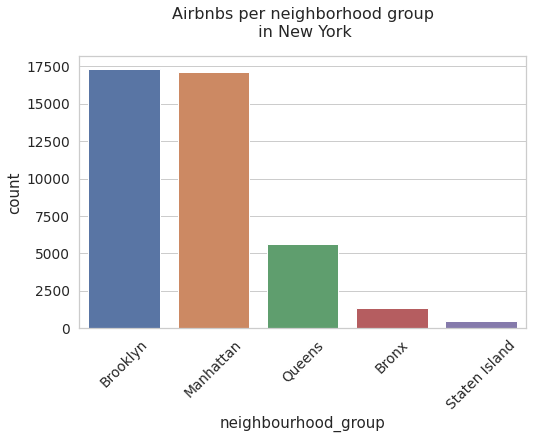

In [97]:
from matplotlib import rcParams
plt.figure(figsize = (8,5))   # JUst for confugure a figure size 
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})  # Seaborn Style
sns.set_context("notebook", font_scale=1.25)            # More Seaborn Style
rcParams['axes.titlepad'] = 20                          # set a space between  the title and the figure
plt.xticks(rotation=45)
neigh_plot = sns.countplot(x = 'neighbourhood_group' , data = data).set_title('Airbnbs per neighborhood group\n in New York',fontsize = 16) 

Note that the most common airbnb districts are Brooklyn and Manhattan. Also note that the difference between the second and third set of neighbors is apparently large. This could be because Brooklyn and Manhattan have more tourist attractions than the others.

In [98]:
freqs = data['neighbourhood_group'].value_counts()
index_abnb_per_km = pd.DataFrame({'neig_group':freqs.index, 'freq_abnbs':freqs,'km_2':[59,183,283,109,151]})
index_abnb_per_km['abnbs/km_2'] = index_abnb_per_km['freq_abnbs'] / index_abnb_per_km['km_2']
index_abnb_per_km

,neig_group,freq_abnbs,km_2,abnbs/km_2
Brooklyn,Brooklyn,17298,59,293.186441
Manhattan,Manhattan,17109,183,93.491803
Queens,Queens,5638,283,19.922261
Bronx,Bronx,1358,109,12.458716
Staten Island,Staten Island,459,151,3.039735


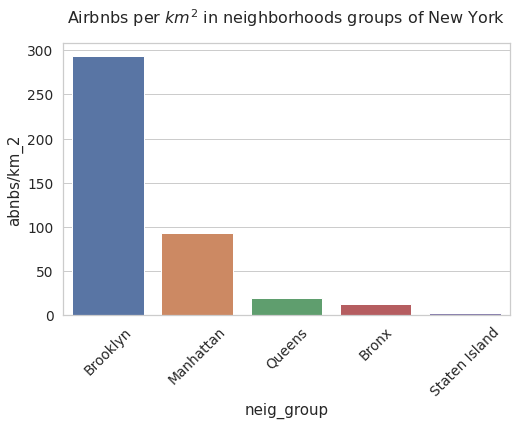

In [99]:
plt.figure(figsize = (8,5))   # JUst for confugure a figure size 
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})  # Seaborn Style
sns.set_context("notebook", font_scale=1.25)            # More Seaborn Style
rcParams['axes.titlepad'] = 20                          # set a space between  the title and the figure
plt.xticks(rotation=45)
neigh_km_plot = sns.barplot(data = index_abnb_per_km, x = 'neig_group', y = 'abnbs/km_2').set_title(r'Airbnbs per $km^2$ in neighborhoods groups of New York',fontsize = 16) 

Now the airbnbs per square kilometer indicator shows us that the frequency order of the districts is the same. However, it is interesting that brooklyn has a big difference with airbnbs despite being the smallest district.

**neighbourhood**

Now we can plot a heat map above new york map to identify the principles neighbourhoods that has more airbnbs hostels than the others. If you are in github and you can't see the map, follow this [link](https://raw.githubusercontent.com/BautistaDavid/Proyectos_ClaseML/main/images/new_york_nbhds.png)

In [100]:
import folium
from folium import plugins
import matplotlib.pyplot as plt
import io
from PIL import Image

stationArr = data[['latitude', 'longitude']].to_numpy()

fol = folium.Map(location = [40.727, -74.097],zoom_start = 11 )
fol.add_children(plugins.HeatMap(stationArr, radius=14)) # ploting the heatmap

fol

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  # Remove the CWD from sys.path while we load stuff.


The heat map allows us to verify that most of the frequencies of the airbnbs neighborhoods are in brooklyn and manhattan.

**room tpye** 

Now we can see a countplot about room types categories in the data

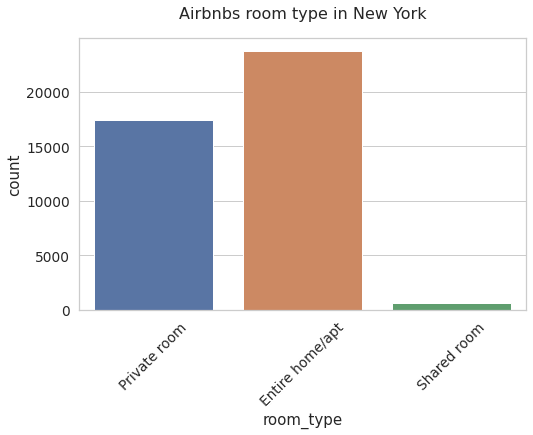

In [101]:
plt.figure(figsize = (8,5))   # JUst for confugure a figure size 
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})  # Seaborn Style
sns.set_context("notebook", font_scale=1.25) 
           # More Seaborn Style
rcParams['axes.titlepad'] = 20                          # set a space between  the title and the figure
plt.xticks(rotation=45)
neigh_plot = sns.countplot(x = 'room_type' , data = data).set_title('Airbnbs room type in New York',fontsize = 16) 

here we can see that the most frequent type of room are entire houses or apartments


---



Below you can find different distribution diagrams of the numerical variables of the data. The interesting thing is that we draw two graphs per variable, the first is the distribution applying the univariate limits and the second is the distribution of the total data. Also you can see some descriptive statistics of the two graphs

**price**

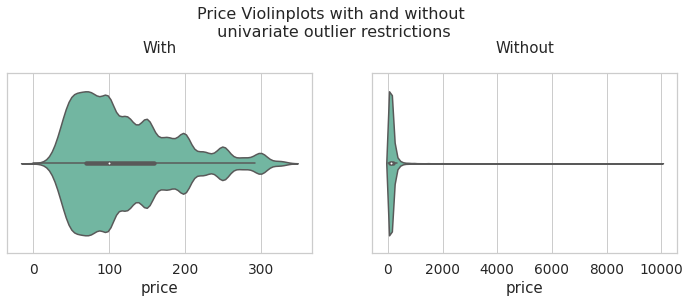

In [102]:
price_data_univariate = data[data['price'] < df_limites_.loc['upper','price']]
fig, ax = plt.subplots(1,2,figsize = (12,4))
plt.subplots_adjust(top=0.75) 
fig.suptitle('Price Violinplots with and without\n univariate outlier restrictions', fontsize=16)
sns.set_context("notebook", font_scale=1.25) 

with_ = sns.violinplot(data = price_data_univariate, x = 'price',ax = ax[0],palette="Set2").set_title('With')
without_ = sns.violinplot(data = data, x = 'price',ax = ax[1],palette="Set2").set_title('Without')


In [103]:
inf = pd.concat([price_data_univariate['price'].describe(),data['price'].describe()], axis = 1)
inf.columns = ['Price with univariate limits','Price Total Data']
inf

,Price with univariate limits,Price Total Data
count,39449.000000,41862.000000
mean,120.987249,153.248173
std,66.684526,249.940511
min,0.000000,0.000000
25%,70.000000,70.000000
50%,100.000000,110.000000
75%,159.000000,175.000000
max,332.000000,10000.000000


**minimum_nights**

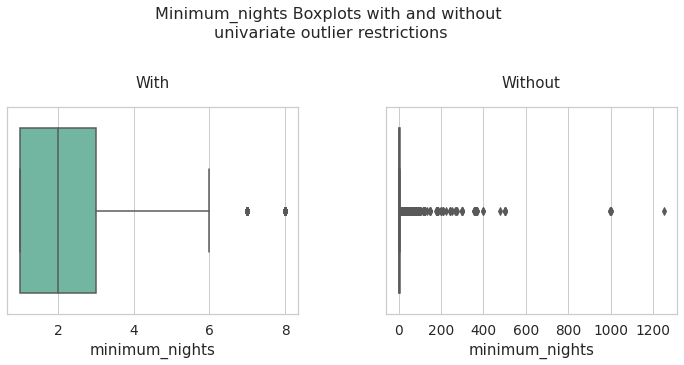

In [104]:
minimum_nights_data_univariate = data[data['minimum_nights'] < df_limites_.loc['upper','minimum_nights']]
fig, ax = plt.subplots(1,2,figsize = (12,5))
plt.subplots_adjust(top=0.7, wspace = 0.3) 
fig.suptitle('Minimum_nights Boxplots with and without \nunivariate outlier restrictions', fontsize=16)
sns.set_context("notebook", font_scale=1.25) 

with_ = sns.boxplot(data = minimum_nights_data_univariate, x = 'minimum_nights',ax = ax[0],palette="Set2").set_title('With')
without_ = sns.boxplot(data = data, x = 'minimum_nights',ax = ax[1],palette="Set2").set_title('Without')

In [105]:
inf = pd.concat([minimum_nights_data_univariate['minimum_nights'].describe(),data['minimum_nights'].describe()], axis = 1)
inf.columns = ['minimum_nights with univariate limits','minimum_nights Total Data']
inf

,minimum_nights with univariate limits,minimum_nights Total Data
count,37472.000000,41862.000000
mean,2.689982,6.092112
std,1.684817,21.981921
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,4.000000
max,8.000000,1250.000000


**number_of_reviews**

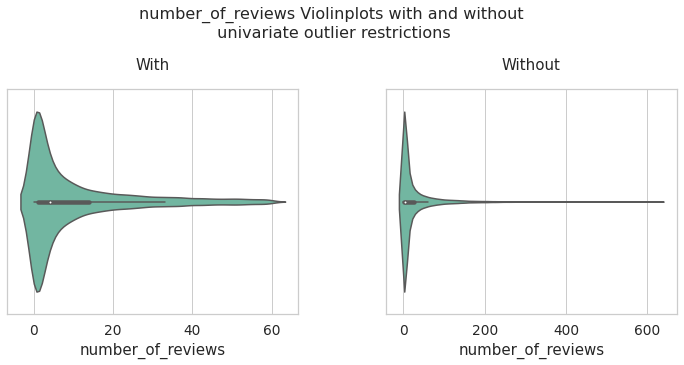

In [106]:
number_of_reviews_data_univariate = data[data['number_of_reviews'] < df_limites_.loc['upper','number_of_reviews']]
fig, ax = plt.subplots(1,2,figsize = (12,5))
plt.subplots_adjust(top=0.75,wspace=0.3) 
fig.suptitle('number_of_reviews Violinplots with and without\n univariate outlier restrictions', fontsize=16)
sns.set_context("notebook", font_scale=1.25) 

with_ = sns.violinplot(data = number_of_reviews_data_univariate, x = 'number_of_reviews',ax = ax[0],palette="Set2").set_title('With')
without_ = sns.violinplot(data = data, x = 'number_of_reviews',ax = ax[1],palette="Set2").set_title('Without')

In [107]:
inf = pd.concat([number_of_reviews_data_univariate['number_of_reviews'].describe(),data['number_of_reviews'].describe()], axis = 1)
inf.columns = ['number_of_reviews with univariate limits','number_of_reviews Total Data']
inf

,number_of_reviews with univariate limits,number_of_reviews Total Data
count,36732.000000,41862.000000
mean,10.062289,24.183293
std,13.960237,46.078980
min,0.000000,0.000000
25%,1.000000,1.000000
50%,4.000000,5.000000
75%,14.000000,25.000000
max,60.000000,629.000000


**reviews_per_month**

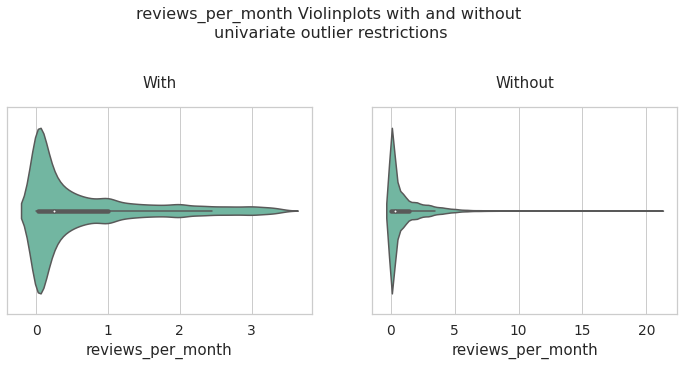

In [108]:
reviews_per_month_data_univariate = data[data['reviews_per_month'] < df_limites_.loc['upper','reviews_per_month']]
fig, ax = plt.subplots(1,2,figsize = (12,5))
plt.subplots_adjust(top=0.7, wspace = 0.2) 
fig.suptitle('reviews_per_month Violinplots with and without \nunivariate outlier restrictions', fontsize=16)
sns.set_context("notebook", font_scale=1.25) 

with_ = sns.violinplot(data = reviews_per_month_data_univariate, x = 'reviews_per_month',ax = ax[0],palette="Set2").set_title('With')
without_ = sns.violinplot(data = data, x = 'reviews_per_month',ax = ax[1],palette="Set2").set_title('Without')


In [109]:
inf = pd.concat([reviews_per_month_data_univariate['reviews_per_month'].describe(),data['reviews_per_month'].describe()], axis = 1)
inf.columns = ['reviews_per_month with univariate limits','reviews_per_month Total Data']
inf

,reviews_per_month with univariate limits,reviews_per_month Total Data
count,38557.000000,41862.000000
mean,0.670479,1.010094
std,0.877857,1.509071
min,0.000000,0.000000
25%,0.030000,0.040000
50%,0.240000,0.320000
75%,1.000000,1.400000
max,3.430000,20.940000


**availability_365**

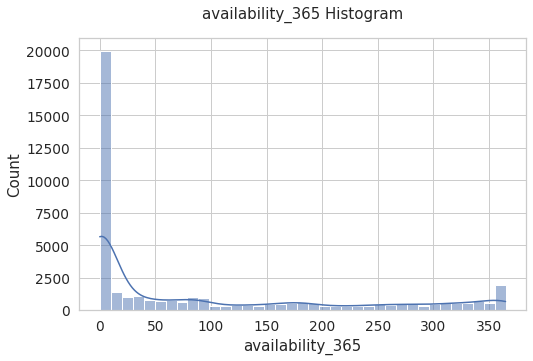

In [110]:
plt.figure(figsize = (8,5))   # JUst for confugure a figure size 
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})  # Seaborn Style
sns.set_context("notebook", font_scale=1.25) 
rcParams['axes.titlepad'] = 20   
# sns.displot(data['availability_365'])
aval = sns.histplot(data = data, x = 'availability_365',palette="Set2",kde = True).set_title('availability_365 Histogram')


#### **Bivariate visualization**

**neighbourhood_group vs room_type**

Below, we can see a count chart that includes the information on districts and room types. Note that in the districts with more airbnbs, they have the majority of full-service hostels. For the rest of the districts they have a majority of hostels of the private room type.

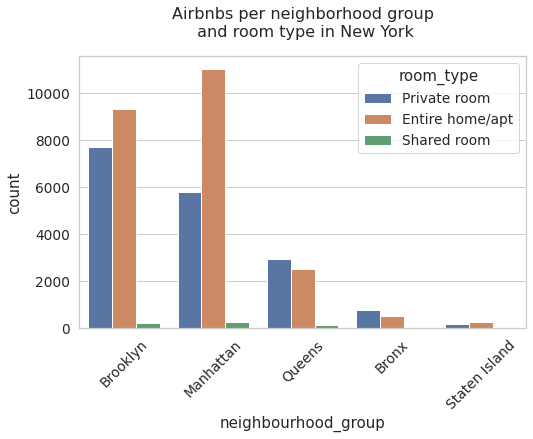

In [111]:
plt.figure(figsize = (8,5))   # Just for confugure a figure size 
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})  # Seaborn Style
sns.set_context("notebook", font_scale=1.25) 
           # More Seaborn Style
rcParams['axes.titlepad'] = 20                          # set a space between  the title and the figure
plt.xticks(rotation=45)
neigh_plot = sns.countplot(x = 'neighbourhood_group' , hue = 'room_type',data = data).set_title('Airbnbs per neighborhood group\n and room type in New York',fontsize = 16) 



---

Below you can see distribution graphs as boxplots and Violinplots of the variables ```price```, ```reviews_per_month``` and  ```minimum_nights```
, being categorized by the variable ```neighbourhood_group```. The above is done both in the sample with limits of outliers of the main variables and with the total data.

**neighbourhood_group vs price** 

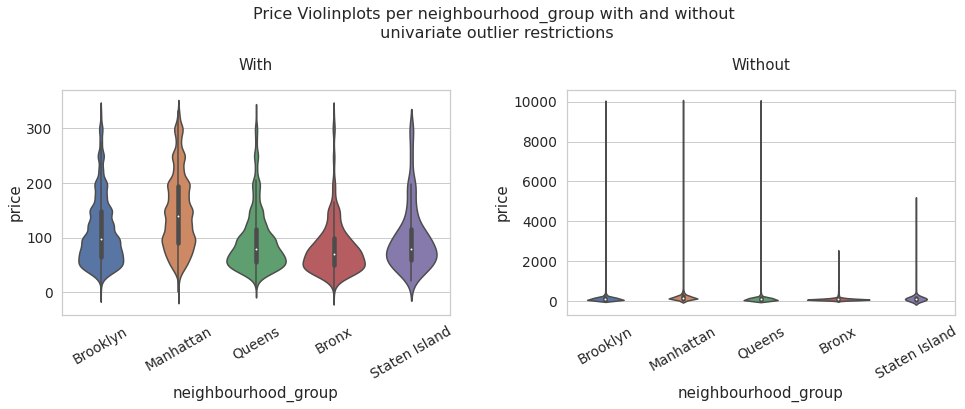

In [112]:
price_data_univariate = data[data['price'] < df_limites_.loc['upper','price']]
fig, ax = plt.subplots(1,2,figsize = (16,5))
plt.subplots_adjust(top=0.75,wspace = 0.3) 
ax[0].set_xticklabels(list(data['neighbourhood_group'].value_counts().index), rotation = 30)
ax[1].set_xticklabels(list(data['neighbourhood_group'].value_counts().index), rotation = 30)

fig.suptitle('Price Violinplots per neighbourhood_group with and without\n univariate outlier restrictions', fontsize=16)
sns.set_context("notebook", font_scale=1.25) 

with_ = sns.violinplot(data = price_data_univariate, x = 'neighbourhood_group', y = 'price' ,ax = ax[0]).set_title('With')
without_ = sns.violinplot(data = data, x = 'neighbourhood_group', y = 'price').set_title('Without')


**neighbourhood_group vs minimum_nights** 

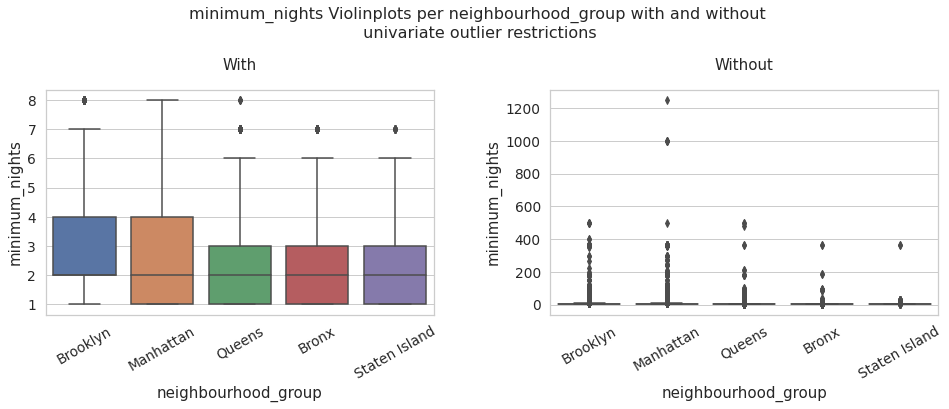

In [113]:
minimum_nights_data_univariate = data[data['minimum_nights'] < df_limites_.loc['upper','minimum_nights']]
fig, ax = plt.subplots(1,2,figsize = (16,5))
plt.subplots_adjust(top=0.75,wspace = 0.3) 
ax[0].set_xticklabels(list(data['neighbourhood_group'].value_counts().index), rotation = 30)
ax[1].set_xticklabels(list(data['neighbourhood_group'].value_counts().index), rotation = 30)

fig.suptitle('minimum_nights Violinplots per neighbourhood_group with and without\n univariate outlier restrictions', fontsize=16)
sns.set_context("notebook", font_scale=1.25) 


with_ = sns.boxplot(data = minimum_nights_data_univariate, x = 'neighbourhood_group', y = 'minimum_nights' ,ax = ax[0]).set_title('With')
# ax[0].xticks(rotation=45)
without_ = sns.boxplot(data = data, x = 'neighbourhood_group', y = 'minimum_nights').set_title('Without')

**neighbourhood_group vs reviews_per_month** 

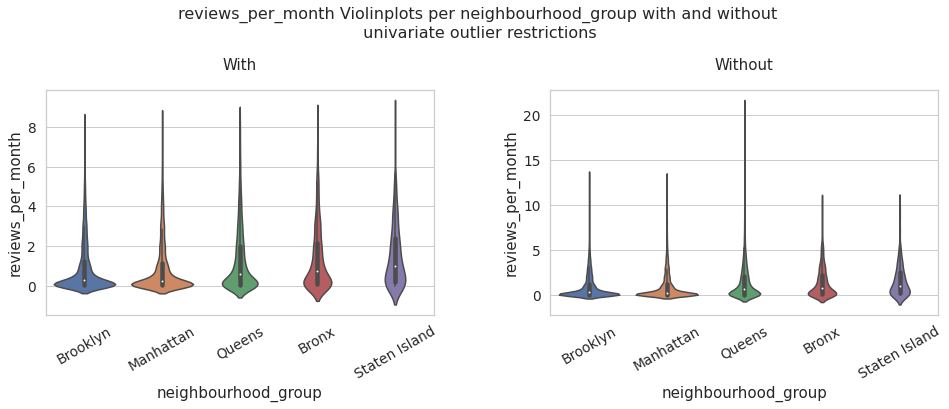

In [114]:
reviews_per_month_data_univariate = data[data['reviews_per_month'] < df_limites_.loc['upper','minimum_nights']]
fig, ax = plt.subplots(1,2,figsize = (16,5))
plt.subplots_adjust(top=0.75,wspace = 0.3) 
ax[0].set_xticklabels(list(data['neighbourhood_group'].value_counts().index), rotation = 30)
ax[1].set_xticklabels(list(data['neighbourhood_group'].value_counts().index), rotation = 30)

fig.suptitle('reviews_per_month Violinplots per neighbourhood_group with and without\n univariate outlier restrictions', fontsize=16)
sns.set_context("notebook", font_scale=1.25) 


with_ = sns.violinplot(data = reviews_per_month_data_univariate, x = 'neighbourhood_group', y = 'reviews_per_month' ,ax = ax[0]).set_title('With')
# ax[0].xticks(rotation=45)
without_ = sns.violinplot(data = data, x = 'neighbourhood_group', y = 'reviews_per_month').set_title('Without')

Next, we are going to plot some heat maps of the correlation levels of the variables using different methods. It can be expected that some variables have a high relationship, for example the number of reviews and reviews per month, it would also be interesting to observe the degree of correlation between the price and the number of reviews or the minimum number of nights

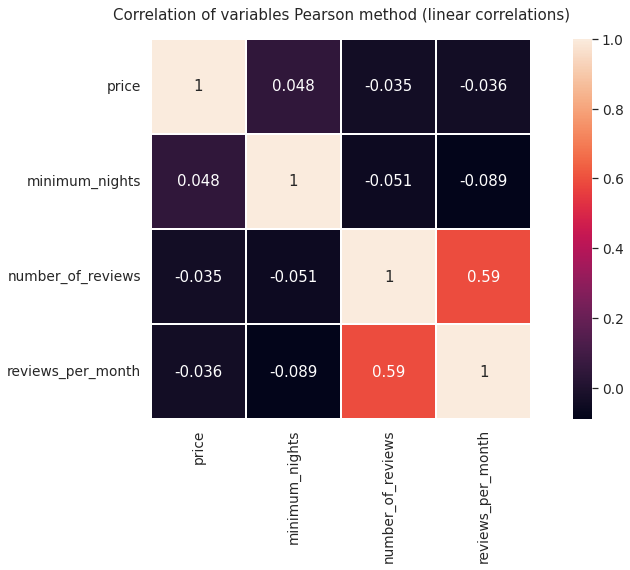

In [115]:
plt.figure(figsize = (15,7))
plt.title('Correlation of variables Pearson method (linear correlations)')
heat1 = sns.heatmap(data_numerical.corr(), annot=True,square = True, linewidths=1)


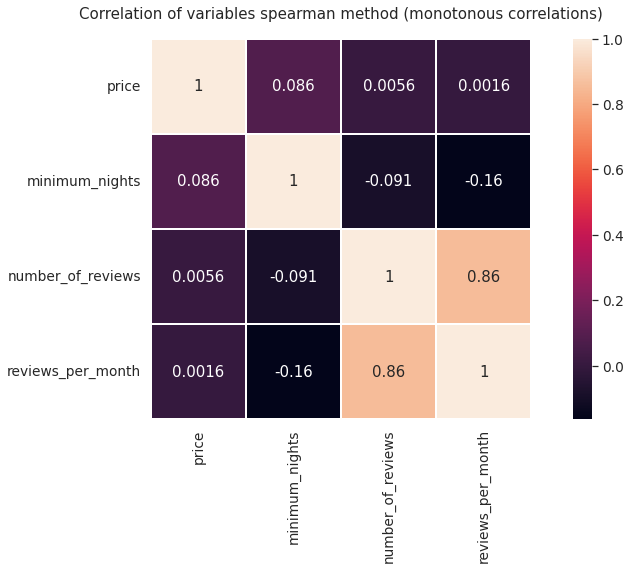

In [116]:
plt.figure(figsize = (15,7))
plt.title('Correlation of variables spearman method (monotonous correlations)')
heat2 = sns.heatmap(data_numerical.corr(method = 'spearman'), annot=True,square = True, linewidths=1)


 Next we are going to generate subplots of the price comparison with two other variables at the same time to study the price distribution more specifically.

By the way, we are going to build a Python function to save repeated lines of code when creating the diagrams

In [117]:
def multi_boxplots(data, variable, title):
  plt.figure(figsize = (15,5))
  sns.set_context("notebook", font_scale=1.25) 
  sns.boxplot(data = data, y = variable ,x = 'neighbourhood_group',hue = 'room_type').set_title(title)
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)



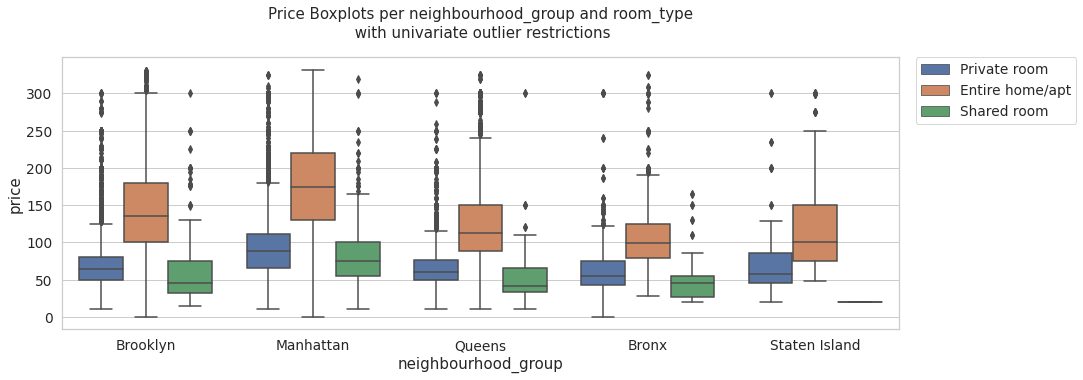

In [118]:
multi_boxplots(price_data_univariate, 'price', 'Price Boxplots per neighbourhood_group and room_type\n with univariate outlier restrictions' )

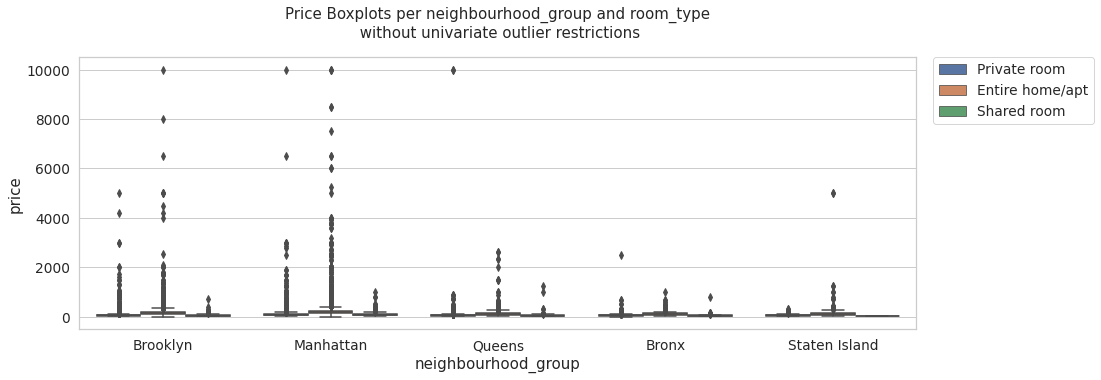

In [119]:
multi_boxplots(data, 'price', 'Price Boxplots per neighbourhood_group and room_type\n without univariate outlier restrictions' )

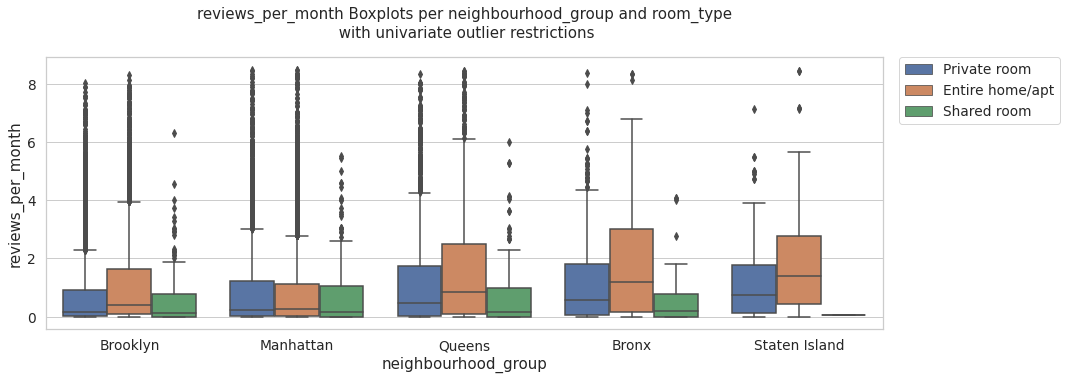

In [120]:
multi_boxplots(reviews_per_month_data_univariate, 'reviews_per_month', 'reviews_per_month Boxplots per neighbourhood_group and room_type\n with univariate outlier restrictions' )

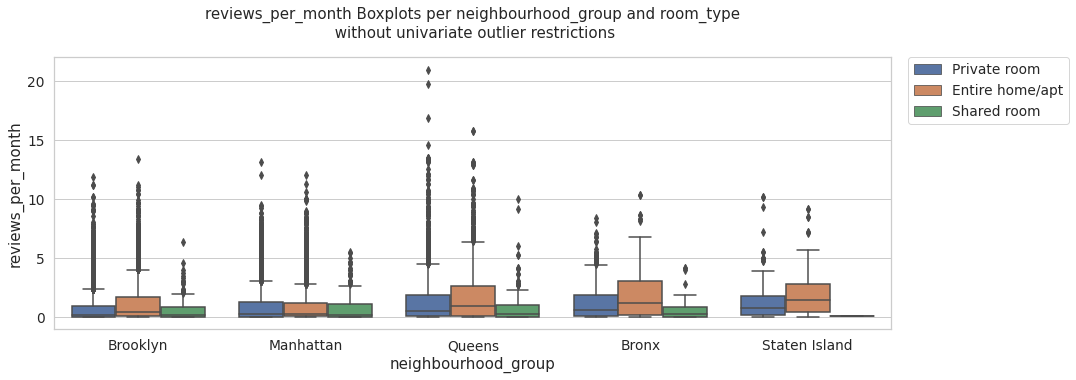

In [121]:
multi_boxplots(data, 'reviews_per_month', 'reviews_per_month Boxplots per neighbourhood_group and room_type\n without univariate outlier restrictions' )

In [122]:
data.pivot_table(index = ['neighbourhood_group'],values = 'price', aggfunc= 'mean')
# mean of the prices by neighbourhood_group

,price
neighbourhood_group,
Bronx,89.509573
Brooklyn,129.074228
Manhattan,198.666959
Queens,106.293189
Staten Island,136.647059


In [123]:
import numpy as np
data.pivot_table(index = ['neighbourhood_group'],values = 'price',aggfunc=np.std)
# standart deviation of the prices by neighbourhood_group

,price
neighbourhood_group,
Bronx,100.414386
Brooklyn,187.441384
Manhattan,307.191291
Queens,215.105580
Staten Island,346.356282


### **recommendations for Airbnb data generators**

It would be advisable to create a system that associates a single location from latitude to longitude to each airbnb, in order to perform an analysis from a different perspective in relation to the total number of hostels.

On the other hand, we can comment that under this analysis and visualization of data we could structure a deeper analysis in order to carry out some type of supervised learning model that allows us to predict the price of a hostel.


### **Some interesting conclusions**

As might be expected, the analysis carried out allows us to observe that Manhattan is the district where the median price tends to be higher. Likewise, reviewing the pivot tables, we can see that this district has the highest average price, however, it also has a standard deviation above the other districts.

A large part of the high prices in the Manhattan district may be due to the characteristics of tourism in the place, so it is possible that with the variables presented by the Airbnb records, it is possible to determine only an effect on the price related to the characteristics of the hostel. without taking into account other variables that could be interesting